In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import random
import albumentations as A
from dataset.segmentation_dataset import SegmentationDataset
from torch.utils.data import DataLoader

In [4]:
dataset = SegmentationDataset('./data/carvana/train', use_cache=True)
img, target = dataset.__getitem__(0)
print(img.shape)
print(img)
print(target.shape)
print(target.unique())
print(target)

torch.Size([3, 1280, 1918])
tensor([[[0.9569, 0.9569, 0.9569,  ..., 0.9569, 0.9569, 0.9569],
         [0.9569, 0.9569, 0.9569,  ..., 0.9569, 0.9569, 0.9569],
         [0.9569, 0.9569, 0.9569,  ..., 0.9569, 0.9569, 0.9569],
         ...,
         [0.7020, 0.7020, 0.7020,  ..., 0.6902, 0.6902, 0.6902],
         [0.7020, 0.7020, 0.7020,  ..., 0.6902, 0.6902, 0.6902],
         [0.7020, 0.7020, 0.7020,  ..., 0.6902, 0.6902, 0.6902]],

        [[0.9608, 0.9608, 0.9608,  ..., 0.9569, 0.9569, 0.9569],
         [0.9608, 0.9608, 0.9608,  ..., 0.9569, 0.9569, 0.9569],
         [0.9608, 0.9608, 0.9608,  ..., 0.9569, 0.9569, 0.9569],
         ...,
         [0.7176, 0.7176, 0.7176,  ..., 0.7059, 0.7059, 0.7059],
         [0.7176, 0.7176, 0.7176,  ..., 0.7059, 0.7059, 0.7059],
         [0.7176, 0.7176, 0.7176,  ..., 0.7059, 0.7059, 0.7059]],

        [[0.9412, 0.9412, 0.9412,  ..., 0.9569, 0.9569, 0.9569],
         [0.9412, 0.9412, 0.9412,  ..., 0.9569, 0.9569, 0.9569],
         [0.9412, 0.9412, 0.94

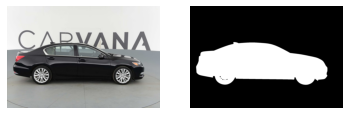

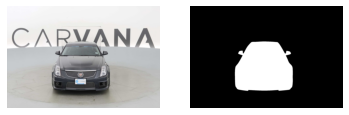

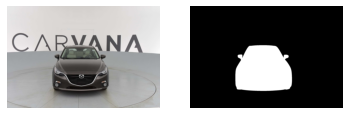

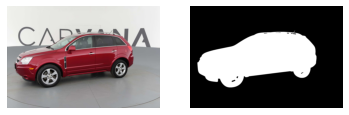

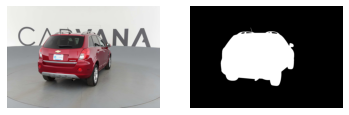

In [5]:
for i in range(5):
    img_idx = random.randint(0,100)
    plt.figure()
    plt.subplot(121)
    plt.axis('off')
    plt.imshow(dataset.__getitem__(img_idx)[0].permute(1, 2, 0))
    plt.subplot(122)
    plt.axis('off')
    plt.imshow(dataset.__getitem__(img_idx)[1].unsqueeze(dim=0).permute(1, 2, 0).float(), cmap=plt.get_cmap('gray'))

In [7]:
dataset = SegmentationDataset('./data/carvana/train/')
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)
x, y = next(iter(dataloader))
print(f'X shape    : {x.shape}')
print(f'X min, max : {x.min()}, {x.max()}')
print(f'Y shape    : {y.shape}')
print(f'Y min, max : {y.min()}, {y.max()}')

X shape    : torch.Size([8, 3, 1280, 1918])
X min, max : 0.0, 1.0
Y shape    : torch.Size([8, 1280, 1918])
Y min, max : 0, 1


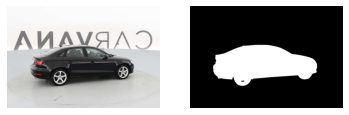

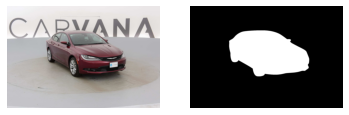

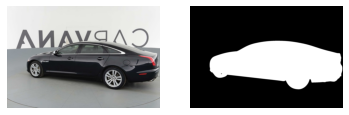

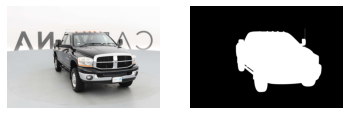

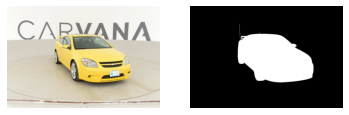

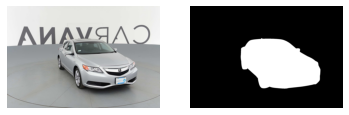

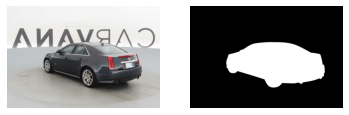

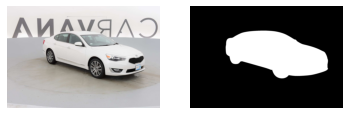

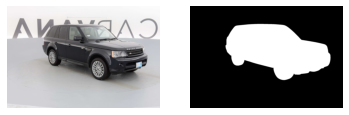

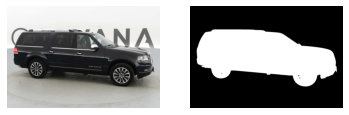

In [9]:
# Augmentation
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.pytorch.ToTensorV2()
], p=1)
dataset = SegmentationDataset('./data/carvana/train/', transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)
for i in range(10):
    img, target = next(iter(dataloader))
    img = img[0]
    target = target[0]
    plt.figure()
    plt.subplot(121)
    plt.axis('off')
    plt.imshow(img.permute(1, 2, 0))
    plt.subplot(122)
    plt.axis('off')
    plt.imshow(target.float(), cmap=plt.get_cmap('gray'))